In [10]:
# Add Matplotlib inlne maging command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [12]:
# Read city CSV file into a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [13]:
# Read the ride CSV file into a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12


In [14]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [15]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [16]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [17]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [18]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")


66

In [20]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"] == "Suburban")

36

In [22]:
# Get the number of dat apoints from the Rural cities
sum(city_data_df["type"] == "Rural")

18

In [23]:
# Get the columns and the rows that are not null from the ride csv file
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [24]:
# Get the columns and the rows that are not null forn the ride csv file
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [25]:
# Get the data types of each column from the ride csv file
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [26]:
# Change the data type of the ride id to int64
ride_data_df['ride_id'] = ride_data_df['ride_id'].astype('int64')
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [28]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=['city', 'city'])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5149250000000,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3908450000000,46,Urban


In [30]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5149250000000,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25,39.40,9070690000000,67,Urban
1621,Christopherfurt,2019-03-13 1:47,32.05,2788820000000,41,Urban
1622,Raymondhaven,2019-03-20 2:20,38.53,8658260000000,11,Urban
1623,Port Johnbury,2019-03-26 7:22,7.63,8089280000000,3,Urban


In [32]:
# Create the Rural and Suburban city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1076080000000,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1985260000000,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4421840000000,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3269650000000,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4018030000000,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2781340000000,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4256850000000,4,Rural


In [33]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [36]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [37]:
# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [38]:
# Get the average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [39]:
# Get the average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [41]:
# Get the average fare for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [42]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [44]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()


city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [45]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

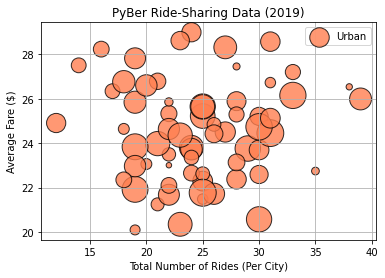

In [49]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

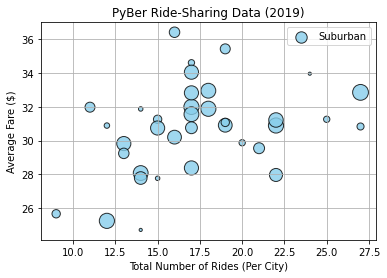

In [51]:
# Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

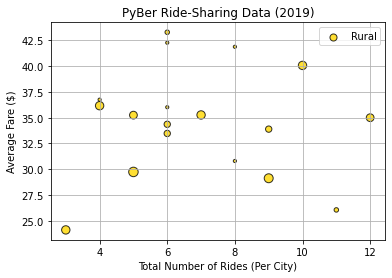

In [52]:
# Build the scatter plot for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

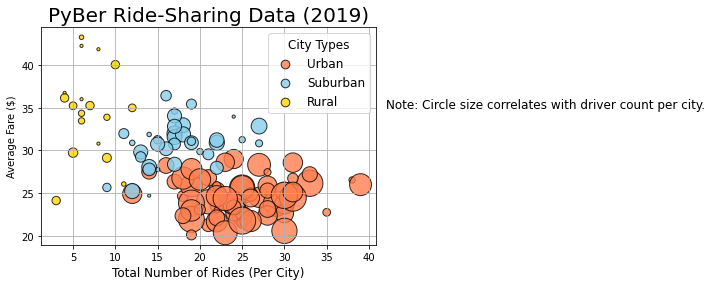

In [57]:
# Add the scatter charts for each type of city.

plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()